In [13]:
import numpy as np
from glob import glob
import os
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import json

In [2]:
train_path = '/home/willbo/data/dcase/train'
val_path = '/home/willbo/data/dcase/val'
test_path = '/home/willbo/data/dcase/test'

In [3]:
train_csv = [file for file in glob(os.path.join(train_path, '*.csv'))]
val_csv = [file for file in glob(os.path.join(val_path, '*.csv'))]
test_csv = [file for file in glob(os.path.join(test_path, '*.csv'))]
all_csv = train_csv + val_csv + test_csv

### Proportion of file annotated

In [4]:
proportions = {}
train_proportions = {}
val_proportions = {}
test_proportions = {}

for file in all_csv:
    df = pd.read_csv(file, header=0, index_col=False)
    df_pos = df[(df == 'POS').any(axis=1)]
    tmp = 0
    for i in range(len(df_pos)):
        tmp += df_pos.iloc[i]['Endtime'] - df_pos.iloc[i]['Starttime']
    proportions['/'.join(file.split('/')[-2:])] = tmp/librosa.get_duration(filename=file.replace('csv', 'wav'))
    
for file in train_csv:
    df = pd.read_csv(file, header=0, index_col=False)
    df_pos = df[(df == 'POS').any(axis=1)]
    tmp = 0
    for i in range(len(df_pos)):
        tmp += df_pos.iloc[i]['Endtime'] - df_pos.iloc[i]['Starttime']
    train_proportions[file.split('/')[-1]] = tmp/librosa.get_duration(filename=file.replace('csv', 'wav'))
    
for file in val_csv:
    df = pd.read_csv(file, header=0, index_col=False)
    df_pos = df[(df == 'POS').any(axis=1)]
    tmp = 0
    for i in range(len(df_pos)):
        tmp += df_pos.iloc[i]['Endtime'] - df_pos.iloc[i]['Starttime']
    val_proportions[file.split('/')[-1]] = tmp/librosa.get_duration(filename=file.replace('csv', 'wav'))
    
for file in test_csv:
    df = pd.read_csv(file, header=0, index_col=False)
    df_pos = df[(df == 'POS').any(axis=1)]
    tmp = 0
    for i in range(len(df_pos)):
        tmp += df_pos.iloc[i]['Endtime'] - df_pos.iloc[i]['Starttime']
    test_proportions[file.split('/')[-1]] = tmp/librosa.get_duration(filename=file.replace('csv', 'wav'))

Text(0.5, 1.0, 'Test files')

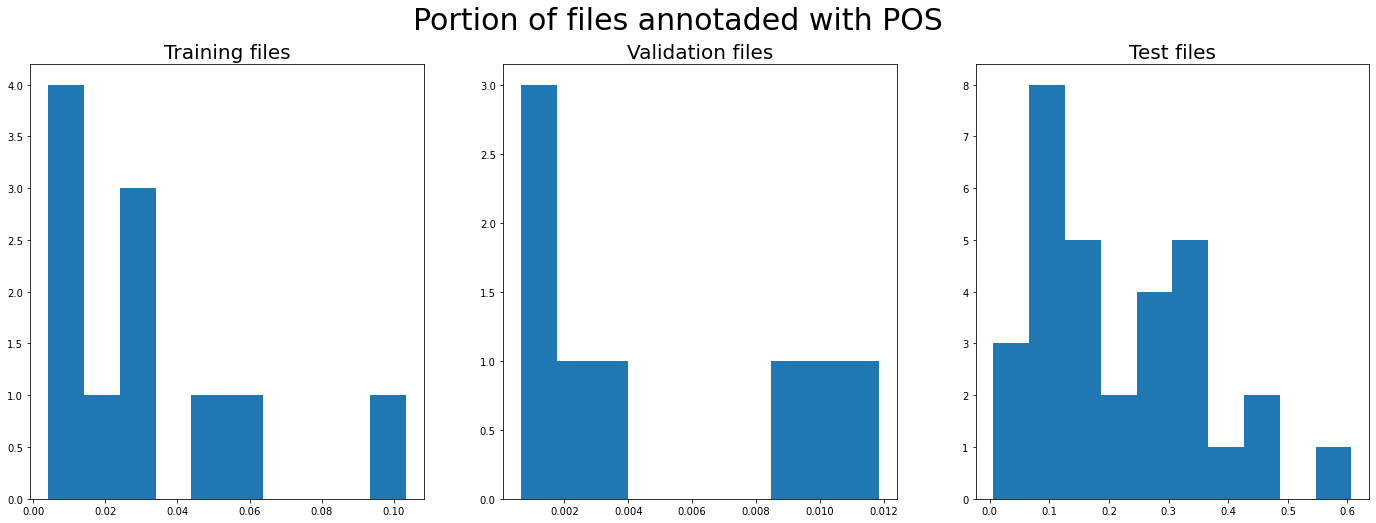

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(24,8))
fig.suptitle('Portion of files annotaded with POS', fontsize=30)
ax[0].hist([e[1] for e in list(train_proportions.items())])
ax[0].set_title('Training files', fontsize=20)
ax[1].hist([e[1] for e in list(val_proportions.items())])
ax[1].set_title('Validation files', fontsize=20)
ax[2].hist([e[1] for e in list(test_proportions.items())])
ax[2].set_title('Test files', fontsize=20)

Valideringsfilerna är överlag betydligt mindre annoterade, men innehåller de mindre annoteringar/s?

### Length of files

In [6]:
lengths = {}
train_lengths = {}
val_lengths = {}
test_lengths = {}

for file in all_csv:
    lengths['/'.join(file.split('/')[-2:])] = librosa.get_duration(filename=file.replace('csv', 'wav'))
    
for file in train_csv:
    train_lengths[file.split('/')[-1]] = librosa.get_duration(filename=file.replace('csv', 'wav'))
    
for file in val_csv:
    val_lengths[file.split('/')[-1]] = librosa.get_duration(filename=file.replace('csv', 'wav'))
    
for file in test_csv:
    test_lengths[file.split('/')[-1]] = librosa.get_duration(filename=file.replace('csv', 'wav'))

Text(0.5, 1.0, 'Test files')

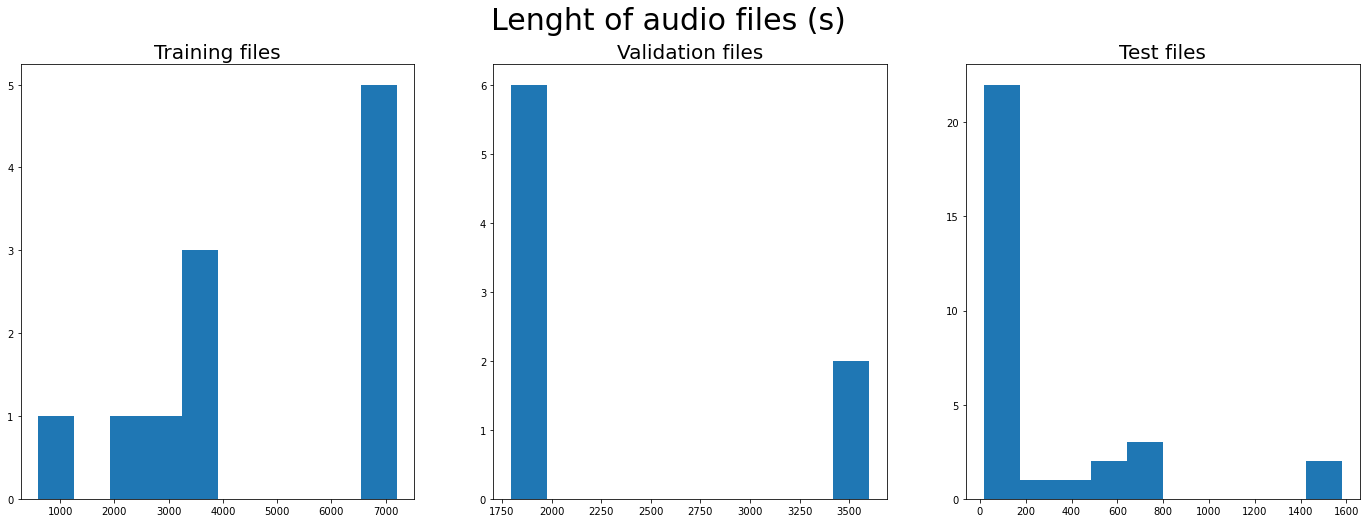

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(24,8))
fig.suptitle('Lenght of audio files (s)', fontsize=30)
ax[0].hist([e[1] for e in list(train_lengths.items())])
ax[0].set_title('Training files', fontsize=20)
ax[1].hist([e[1] for e in list(val_lengths.items())])
ax[1].set_title('Validation files', fontsize=20)
ax[2].hist([e[1] for e in list(test_lengths.items())])
ax[2].set_title('Test files', fontsize=20)

### Distribution of event lengths per audio file in contrast to average length of five first events

TODO: Make figures look nice.

In [8]:
train_events = {}
val_events = {}
test_events = {}

for file in train_csv:
    df = pd.read_csv(file, header=0, index_col=False)
    df_pos = df[(df == 'POS').any(axis=1)]
    tmp = []
    for i in range(len(df_pos)):
        tmp += [df_pos.iloc[i]['Endtime'] - df_pos.iloc[i]['Starttime']]
    train_events[file.split('/')[-1]] = tmp
    
for file in val_csv:
    df = pd.read_csv(file, header=0, index_col=False)
    df_pos = df[(df == 'POS').any(axis=1)]
    tmp = []
    for i in range(len(df_pos)):
        tmp += [df_pos.iloc[i]['Endtime'] - df_pos.iloc[i]['Starttime']]
    val_events[file.split('/')[-1]] = tmp
    
for file in test_csv:
    df = pd.read_csv(file, header=0, index_col=False)
    df_pos = df[(df == 'POS').any(axis=1)]
    tmp = []
    for i in range(len(df_pos)):
        tmp += [df_pos.iloc[i]['Endtime'] - df_pos.iloc[i]['Starttime']]
    test_events[file.split('/')[-1]] = tmp

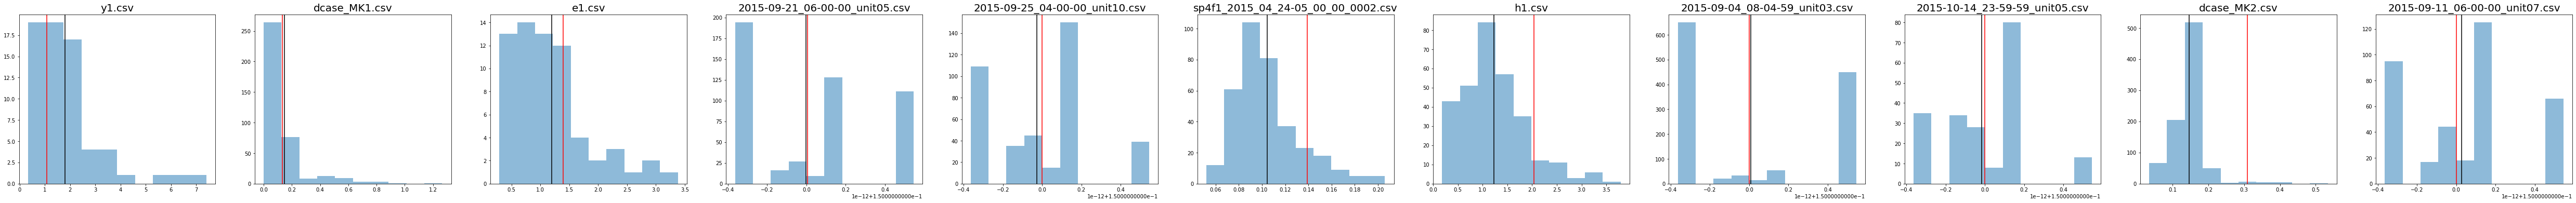

In [9]:
fig, ax = plt.subplots(1, len(list(train_events.keys())), figsize=(8*len(list(train_events.keys())), 6))

for i, key in enumerate(train_events.keys()):
    ax[i].set_title(key, fontsize=20)
    ax[i].hist(train_events[key], alpha=0.5)
    ax[i].axvline(x=np.mean(train_events[key][0:5]), c='red')
    ax[i].axvline(x=np.mean(train_events[key]), c='black')

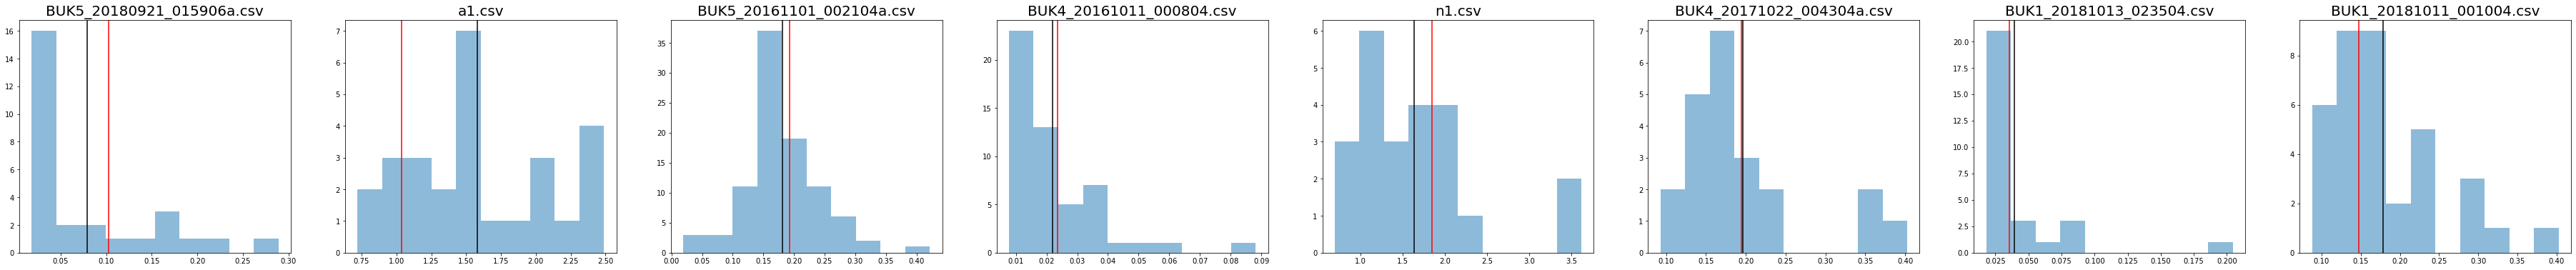

In [10]:
fig, ax = plt.subplots(1, len(list(val_events.keys())), figsize=(8*len(list(val_events.keys())), 6))

for i, key in enumerate(val_events.keys()):
    ax[i].set_title(key, fontsize=20)
    ax[i].hist(val_events[key], alpha=0.5)
    ax[i].axvline(x=np.mean(val_events[key][0:5]), c='red')
    ax[i].axvline(x=np.mean(val_events[key]), c='black')

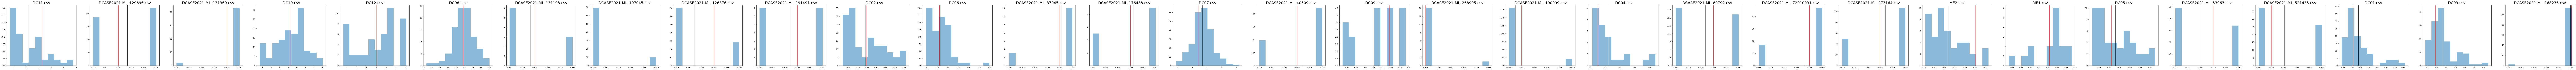

In [11]:
fig, ax = plt.subplots(1, len(list(test_events.keys())), figsize=(8*len(list(test_events.keys())), 6))

for i, key in enumerate(test_events.keys()):
    ax[i].set_title(key, fontsize=20)
    ax[i].hist(test_events[key], alpha=0.5)
    ax[i].axvline(x=np.mean(test_events[key][0:5]), c='red')
    ax[i].axvline(x=np.mean(test_events[key]), c='black')

### Investigate correlation of difference in mean to F-measure difference when median filtering respectively not.

To do this properly we really need the same model more or less.
This is the way I think.

In [12]:
val_report_no_filter_path = '/home/willbo/repos/soundscape-analysis/few_shot_learning/outputs/resnet_specaugment_spl_nomf_seed100/Evaluation_report__VAL_14122021_13_13_18.json'
val_report_filter_path = '/home/willbo/repos/soundscape-analysis/few_shot_learning/outputs/resnet_specaugment_spl_seed100/Evaluation_report__VAL_09122021_18_10_41.json'